In [1]:
#importing libraries
import pandas as pd
import networkx as nx
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# import the regressor 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import preprocessing

from matplotlib.cbook.deprecation import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)

In [2]:
#reading data
data = pd.read_csv('./Shakespeare_data.csv')

In [3]:
#Replacing NaN value of Other
data['Player'].replace(np.nan, 'Other',inplace = True)
display(data)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,1,Henry IV,NaN,NaN,Other,ACT I
1,2,Henry IV,NaN,NaN,Other,SCENE I. London. The palace.
2,3,Henry IV,NaN,NaN,Other,"Enter KING HENRY, LORD JOHN OF LANCASTER, the ..."
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
...,...,...,...,...,...,...
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first
111394,111395,A Winters Tale,38.0,5.3.183,LEONTES,We were dissever'd: hastily lead away.


In [4]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111396 entries, 0 to 111395
Data columns (total 6 columns):
Dataline            111396 non-null int64
Play                111396 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111396 non-null object
PlayerLine          111396 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


None

In [5]:
#Numbers of Plays
print("Number of plays are: " + str(data['Play'].nunique()))

print("Number of Unique players = ", len(data.Player.unique()))

Number of plays are: 36
Number of Unique players =  935


In [6]:
#Play's Name
pd.DataFrame(data['Play'].unique().tolist(), columns=['Play Name'])

,Play Name
0,Henry IV
1,Henry VI Part 1
2,Henry VI Part 2
3,Henry VI Part 3
4,Alls well that ends well
5,As you like it
6,Antony and Cleopatra
7,A Comedy of Errors
8,Coriolanus
9,Cymbeline


There are total 36 different plays in the CSV file and each plays have different number of players and each players have differnt number of lines.

So First, I'll find out the number of players in each Play and then number of lines of each plays.

,Num Players,Play
0,71,Richard III
1,65,Henry VI Part 2
2,62,Coriolanus
3,55,Timon of Athens
4,55,Antony and Cleopatra
5,53,Henry VI Part 1
6,51,Julius Caesar
7,48,Pericles
8,47,Henry V
9,47,Henry VIII


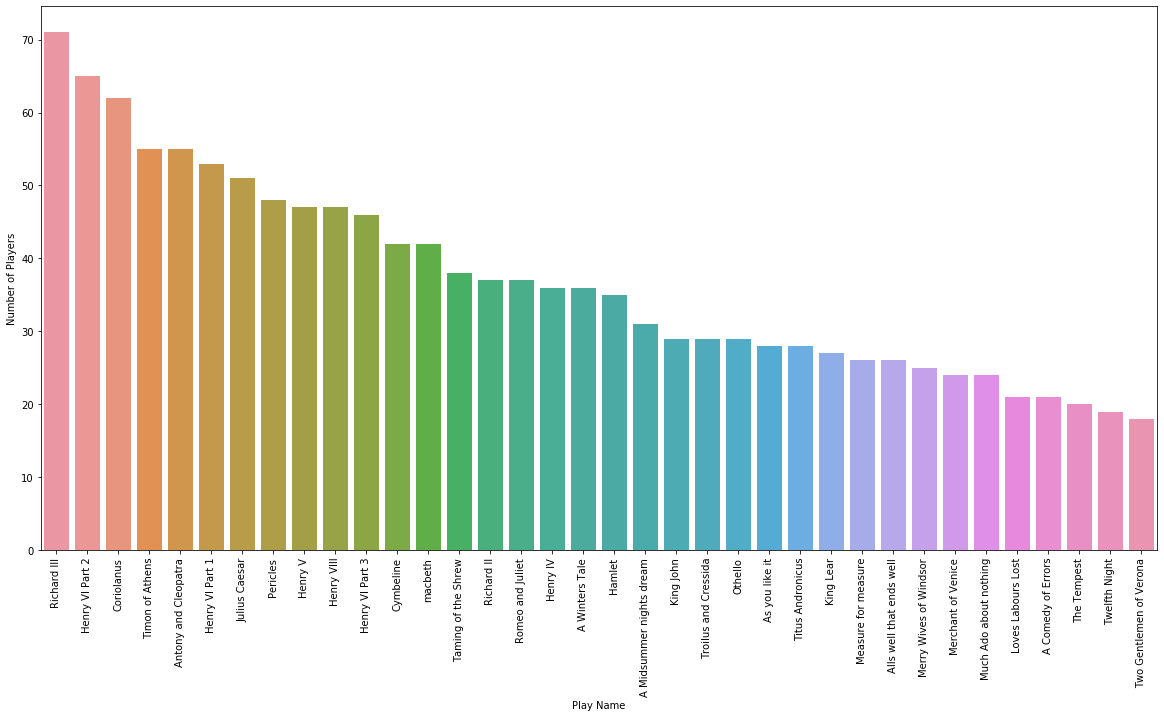

In [7]:
#This block will give Number of players in each Play
numberPlayers = data.groupby(['Play'])['Player'].nunique().sort_values(ascending= False).to_frame()
numberPlayers['Play'] = numberPlayers.index.tolist()
numberPlayers.columns = ['Num Players','Play']
numberPlayers.index= np.arange(0,len(numberPlayers))
display(numberPlayers)

#plotting graph
plt.figure(figsize=(20,10))
ax = sns.barplot(x='Play',y='Num Players',data=numberPlayers)
ax.set(ylabel='Number of Players', xlabel='Play Name')
plt.xticks(rotation=90)
plt.show()

We can see from the above that RichardIII has the maximum number of players i.e. 71.

Now, I'll find out the number of lines in each play.

In [9]:
#Total Number of Lines in each Play
play_data = data.groupby('Play').count().sort_values(by='PlayerLine',ascending=False)['PlayerLine']
play_data = play_data.to_frame()
play_data['Play'] = play_data.index.tolist()
play_data.index = np.arange(0,len(play_data)) #changing the index from plays to numbers
play_data.columns =['Lines','Play']
display(play_data)

,Lines,Play
0,4244,Hamlet
1,3992,Coriolanus
2,3958,Cymbeline
3,3941,Richard III
4,3862,Antony and Cleopatra
5,3766,King Lear
6,3762,Othello
7,3711,Troilus and Cressida
8,3489,A Winters Tale
9,3419,Henry VIII


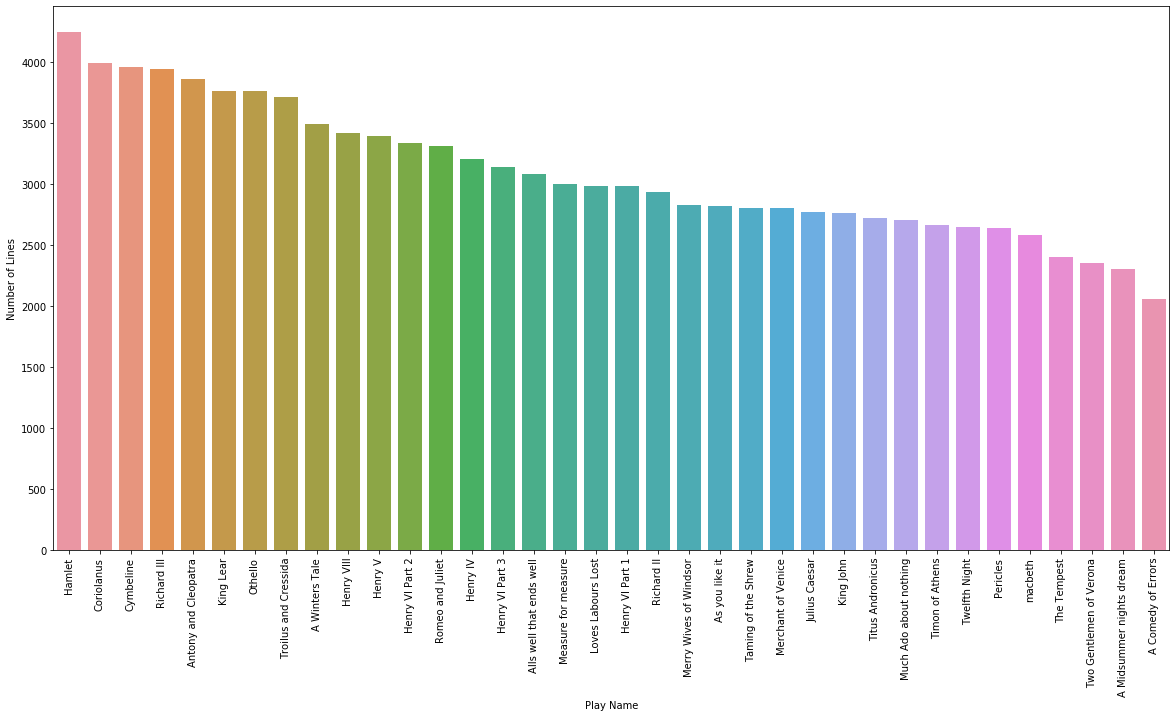

In [10]:
#Plotting graph for number of lines in each play
plt.figure(figsize=(20,10))
ax= sns.barplot(x='Play',y='Lines',data=play_data, order = play_data['Play'])
ax.set(ylabel='Number of Lines', xlabel='Play Name')
plt.xticks(rotation=90)
plt.show()


In [11]:
#unique play name list
play_name = data['Play'].unique().tolist()

Now, I'm going to analyze the lines of each players in each play to try to find out the positive , negative and neutral sentiments of the play.

In [17]:
sia = SIA()

plays_lines = data[['Play', 'PlayerLine']]

play_sentiments ={}

for play in play_name:
    p = plays_lines[plays_lines['Play'] == play]['PlayerLine']

    neg = 0
    pos = 0
    neu = 0

    for eachLine in p:
        sentiments = sia.polarity_scores(eachLine)    
        neg += sentiments['neg']
        pos += sentiments['pos']
        neu += sentiments['neu']
    
    len_p = 100/len(p)
    
    neg = round((neg * len_p) ,2)
    pos = round((pos * len_p) ,2)
    neu = round((neu * len_p) ,2)
    
    play_sentiments[play] = {'Negative': neg, 'Positive': pos, 'Neutral': neu}


In above code for each plays, I'm fetching all the lines and finding out the sentiments using nltk.sentiment. 

After that for each play I've found out the percentage of the sentiments. 

In [18]:
play_sentiments = pd.DataFrame(play_sentiments).transpose().reset_index()

play_sentiments.set_index("index", inplace = True)

display(play_sentiments)

,Negative,Positive,Neutral
index,,,
Henry IV,8.06,9.79,82.15
Henry VI Part 1,9.35,10.26,80.39
Henry VI Part 2,9.35,9.75,80.90
Henry VI Part 3,8.96,10.47,80.57
Alls well that ends well,6.84,12.76,80.41
As you like it,7.18,13.03,79.79
Antony and Cleopatra,6.81,10.99,82.20
A Comedy of Errors,8.25,7.45,84.29
Coriolanus,7.34,10.84,81.82


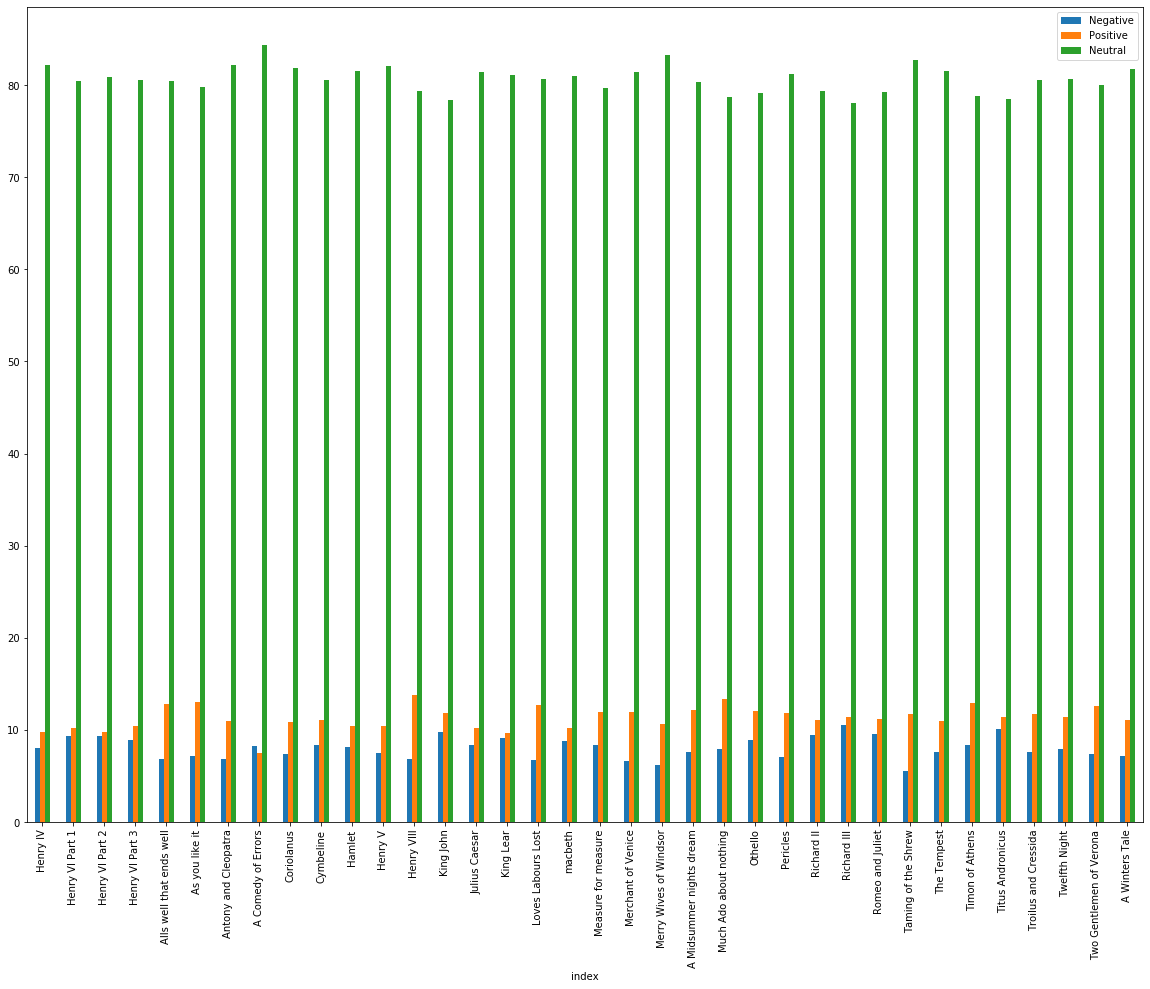

In [19]:
play_sentiments.plot(kind='bar', figsize=(20,15))

From the abve graph we can clearly see that all the plays have more than 80% neutral statements and around 8% to 15% postive and negative statements.

---
Now, I'm going to apply the Classifiction model into the main dataset.

In [12]:
#copying main dataset
play_df = data

#dropping NaN values
play_df = play_df.dropna()

display(play_df)

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil
...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,5.3.179,LEONTES,"Is troth-plight to your daughter. Good Paulina,"
111391,111392,A Winters Tale,38.0,5.3.180,LEONTES,"Lead us from hence, where we may leisurely"
111392,111393,A Winters Tale,38.0,5.3.181,LEONTES,Each one demand an answer to his part
111393,111394,A Winters Tale,38.0,5.3.182,LEONTES,Perform'd in this wide gap of time since first


In [13]:
# Separating the Act, Scene and Line column

acts = []
scenes = []
lines = []

for row in play_df["ActSceneLine"]:    
    acts.append(row.split('.')[0])
    scenes.append(row.split('.')[1])
    lines.append(row.split('.')[2])


In above code, I'm Separating out the ActSceneLine column into three different data column.

In [14]:
# Adding New columns into dataframe and removing previous ActSceneLine column

play_df.insert(len(play_df.columns), 'Act', acts, True)
play_df.insert(len(play_df.columns), 'Scene', scenes, True)
play_df.insert(len(play_df.columns), 'Line', lines, True)
play_df = play_df.drop(axis=1, columns='ActSceneLine')

display(play_df)

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line
3,4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,",1,1,1
4,5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,",1,1,2
5,6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils,1,1,3
6,7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.,1,1,4
7,8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil,1,1,5
...,...,...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,LEONTES,"Is troth-plight to your daughter. Good Paulina,",5,3,179
111391,111392,A Winters Tale,38.0,LEONTES,"Lead us from hence, where we may leisurely",5,3,180
111392,111393,A Winters Tale,38.0,LEONTES,Each one demand an answer to his part,5,3,181
111393,111394,A Winters Tale,38.0,LEONTES,Perform'd in this wide gap of time since first,5,3,182


In [15]:
# Converting Plays and Player into intergers

# Replacing player's name with a integer value and adding new column
players_name = pd.Series(play_df["Player"], dtype="category")
players_name = players_name.cat.codes
play_df.insert(len(play_df.columns), 'PlayerCode', players_name, True)

# Replacing play's name with a numeric value and adding new column
playsCode = pd.Series(play_df["Play"], dtype="category")
playsCode = playsCode.cat.codes
play_df.insert(len(play_df.columns), 'PlayCode', playsCode, True)

display(play_df)

,Dataline,Play,PlayerLinenumber,Player,PlayerLine,Act,Scene,Line,PlayerCode,PlayCode
3,4,Henry IV,1.0,KING HENRY IV,"So shaken as we are, so wan with care,",1,1,1,457,9
4,5,Henry IV,1.0,KING HENRY IV,"Find we a time for frighted peace to pant,",1,1,2,457,9
5,6,Henry IV,1.0,KING HENRY IV,And breathe short-winded accents of new broils,1,1,3,457,9
6,7,Henry IV,1.0,KING HENRY IV,To be commenced in strands afar remote.,1,1,4,457,9
7,8,Henry IV,1.0,KING HENRY IV,No more the thirsty entrance of this soil,1,1,5,457,9
...,...,...,...,...,...,...,...,...,...,...
111390,111391,A Winters Tale,38.0,LEONTES,"Is troth-plight to your daughter. Good Paulina,",5,3,179,494,2
111391,111392,A Winters Tale,38.0,LEONTES,"Lead us from hence, where we may leisurely",5,3,180,494,2
111392,111393,A Winters Tale,38.0,LEONTES,Each one demand an answer to his part,5,3,181,494,2
111393,111394,A Winters Tale,38.0,LEONTES,Perform'd in this wide gap of time since first,5,3,182,494,2


In above code, I'm assigning each player a unique PlayersCode as well as each play a unique Playocde beacause PlayerName and Play Name are in string format and it'll not work in the Classfication model.

Now, on the above dataset, I'm going to apply Random Forest Classification.

In [20]:
#Applying RandomForest Classifier

LE = preprocessing.LabelEncoder()
play_df["PlayerLine"] = LE.fit_transform(play_df["PlayerLine"])

#Taking only necessarry data which is in numeric value
X=play_df[['PlayerLinenumber', 'Act', 'Scene', 'Line', 'PlayCode']]
y=play_df['Player']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # 80% training and 20% test

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=100, max_features=3)

clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
y_pred=clf.predict(X_test)
print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.8168893538110409


---
#### Summary of what I did in this Project.

* After reading all the data from the CSV, I have dropped the NaN values.
* Fetched total number of plays and unique play names.
* Fetched total number of players(characters) in each play and unique player names in each play.
* Visualized the above data in a bar graph. 
* Fetched total number of lines in each play.
* Grouped the total number of lines of each players in each play.
* Again used a bar graph for visualizing the data.
* Grouped the lines according to the plays and passed the lines in sentimental analyzer to find out the whole sentiment of a play.
* For each play, found out the Positive, Negative, and Neutral percentage of the sentiment and visualized the findings.
* Copied the main dataset into new data-frames for building the classifcation model.
* Separated out the ActSceneLine column into three different data column.
* Removed previous ActSceneLine column and added the new individual columns.
* Converted the Plays and Player into intergers and added into the dataset.
* Finally, applying RandomForest Classifier on the dataset,found out the accuracy of the model..